In [1]:
import blinpy as bp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from helpers import *
%matplotlib inline

In [2]:
# generate data
xobs = -np.pi + 2*np.pi*np.random.random(50)
yobs = -np.sin(xobs)**3 + np.cos(xobs)**3 + 0.1*np.random.randn(len(xobs))

In [3]:
# define the fitting grid
xfittest = np.linspace(-np.pi,np.pi,50)
ytrue = -np.sin(xfittest)**3 + np.cos(xfittest)**3
n = len(xfittest)

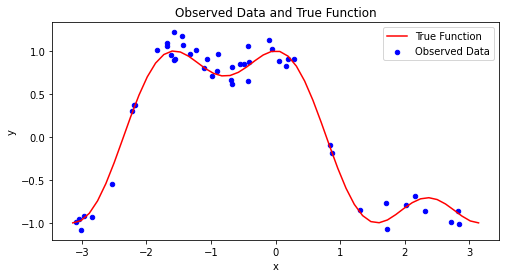

In [4]:
fig = plt.figure(figsize=(8,4))
plt.scatter(xobs, yobs, label='Observed Data', color='blue', s=20)
plt.plot(xfittest, ytrue, label='True Function', color='red')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Observed Data and True Function')
plt.savefig("toy_samples_figures/original.pdf", format="pdf", bbox_inches="tight")
plt.show()

Best parameters: corrlen=0.9444444444444444, sigma=1.3666666666666667, energy=1.1555555555555557
        Model  Mean Squared Error  Root Mean Squared Error  \
0  exp square            0.003006                 0.054826   
1    rat quad            0.004005                 0.063288   
2     orn uhl            0.019221                 0.138640   

   Mean Absolute Error  R2 Score  
0             0.048155  0.995245  
1             0.053892  0.993663  
2             0.098943  0.969592  


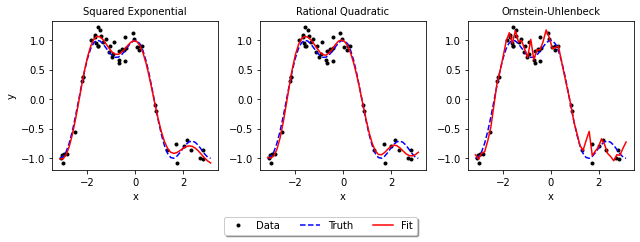

In [5]:
perf_df, fig = fit_gp_gammy(xobs=xobs, yobs=yobs, xfit=xfittest, ytrue=ytrue)
fig.savefig("toy_samples_figures/figure1.pdf", format="pdf", bbox_inches="tight")
print(perf_df)
plt.show()

                           Model  Mean Squared Error  Root Mean Squared Error  \
0                     exp square            0.003006                 0.054826   
1                       rat quad            0.004005                 0.063288   
2                        orn uhl            0.019221                 0.138640   
3                         Smooth            0.006738                 0.082085   
4              Smooth + Periodic            0.006895                 0.083037   
5  Smooth + Periodic + Symmetric            0.004314                 0.065678   

   Mean Absolute Error  R2 Score  
0             0.048155  0.995245  
1             0.053892  0.993663  
2             0.098943  0.969592  
3             0.067255  0.989340  
4             0.065221  0.989092  
5             0.053683  0.993176  


<Figure size 648x216 with 0 Axes>

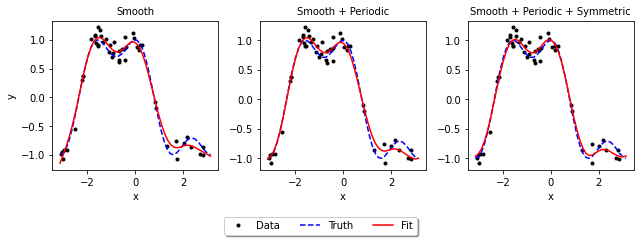

In [6]:
perf_lm, fig = fit_difference_priors(xobs=xobs, yobs=yobs, xfit=xfittest, ytrue=ytrue)
fig.savefig("toy_samples_figures/figure2.pdf", format="pdf", bbox_inches="tight")
combined_df = pd.concat([perf_df, perf_lm], ignore_index=True)
print(combined_df)
plt.show()

                           Model  Mean Squared Error  Root Mean Squared Error  \
0                     exp square            0.003006                 0.054826   
1                       rat quad            0.004005                 0.063288   
2                        orn uhl            0.019221                 0.138640   
3                         Smooth            0.006738                 0.082085   
4              Smooth + Periodic            0.006895                 0.083037   
5  Smooth + Periodic + Symmetric            0.004314                 0.065678   
6              Linear Regression            0.566025                 0.752346   

   Mean Absolute Error  R2 Score  
0             0.048155  0.995245  
1             0.053892  0.993663  
2             0.098943  0.969592  
3             0.067255  0.989340  
4             0.065221  0.989092  
5             0.053683  0.993176  
6             0.665272  0.104533  


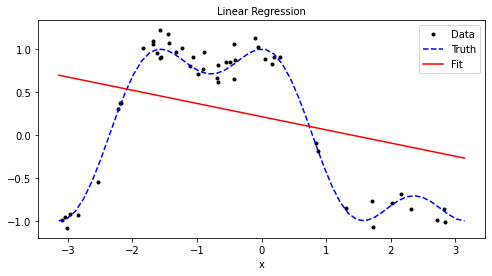

In [7]:
perf_df2, fig2 = fit_linear_regression(xobs=xobs, yobs=yobs, xfit=xfittest, ytrue=ytrue)
fig2.savefig("toy_samples_figures/figure3.pdf", format="pdf", bbox_inches="tight")
combined_df = pd.concat([combined_df, perf_df2], ignore_index=True)
print(combined_df)
plt.show()

                           Model  Mean Squared Error  Root Mean Squared Error  \
0                     exp square            0.003006                 0.054826   
1                       rat quad            0.004005                 0.063288   
2                        orn uhl            0.019221                 0.138640   
3                         Smooth            0.006738                 0.082085   
4              Smooth + Periodic            0.006895                 0.083037   
5  Smooth + Periodic + Symmetric            0.004314                 0.065678   
6              Linear Regression            0.566025                 0.752346   
7                  Random Forest            0.012084                 0.109925   

   Mean Absolute Error  R2 Score  
0             0.048155  0.995245  
1             0.053892  0.993663  
2             0.098943  0.969592  
3             0.067255  0.989340  
4             0.065221  0.989092  
5             0.053683  0.993176  
6             0.665272  0

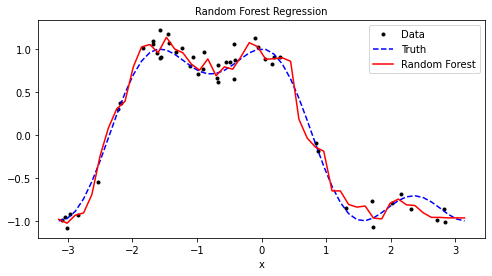

In [8]:
perf_rf, fig3 = fit_rf_regression(xobs=xobs, yobs=yobs, xfit=xfittest, ytrue=ytrue)
fig3.savefig("toy_samples_figures/figure4.pdf", format="pdf", bbox_inches="tight")
combined_df = pd.concat([combined_df, perf_rf], ignore_index=True)
print(combined_df)
plt.show()

                           Model  Mean Squared Error  Root Mean Squared Error  \
0                     exp square            0.003006                 0.054826   
1                       rat quad            0.004005                 0.063288   
2                        orn uhl            0.019221                 0.138640   
3                         Smooth            0.006738                 0.082085   
4              Smooth + Periodic            0.006895                 0.083037   
5  Smooth + Periodic + Symmetric            0.004314                 0.065678   
6              Linear Regression            0.566025                 0.752346   
7                  Random Forest            0.012084                 0.109925   
8                 Frequentist AM            0.009018                 0.094964   

   Mean Absolute Error  R2 Score  
0             0.048155  0.995245  
1             0.053892  0.993663  
2             0.098943  0.969592  
3             0.067255  0.989340  
4             

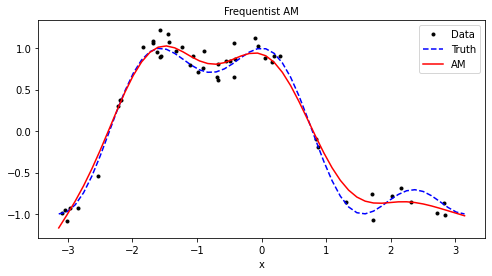

In [9]:
perf4, fig4 = fit_gam_regression(xobs=xobs, yobs=yobs, xfit=xfittest, ytrue=ytrue)
fig4.savefig("toy_samples_figures/figure5.pdf", format="pdf", bbox_inches="tight")
combined_df = pd.concat([combined_df, perf4], ignore_index=True)
print(combined_df)
plt.show()

In [10]:
result = pd.DataFrame(combined_df)
result = result.round(5)
result.head(10)

,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R2 Score
0,exp square,0.00301,0.05483,0.04816,0.99524
1,rat quad,0.00401,0.06329,0.05389,0.99366
2,orn uhl,0.01922,0.13864,0.09894,0.96959
3,Smooth,0.00674,0.08209,0.06725,0.98934
4,Smooth + Periodic,0.00690,0.08304,0.06522,0.98909
5,Smooth + Periodic + Symmetric,0.00431,0.06568,0.05368,0.99318
6,Linear Regression,0.56602,0.75235,0.66527,0.10453
7,Random Forest,0.01208,0.10993,0.09154,0.98088
8,Frequentist AM,0.00902,0.09496,0.07896,0.98573
